# Dimensionality Expansion
## Combining Datasets
In this notebook, we'll practice how to combine datasets.  We'll use the Fitbit dataset from Kaggle.com found here: https://www.kaggle.com/datasets/arashnic/fitbit?resource=download

In [1]:
# Import libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Workshop Functions
import sys
sys.path.append('..')
from WKDSS320_functions import * 

In [2]:
Activity = pd.read_csv('dailyActivity_merged.csv')
Sleep = pd.read_csv('sleepDay_merged.csv')

In [3]:
Activity.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [4]:
Sleep.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 0:00,1,327,346
1,1503960366,4/13/2016 0:00,2,384,407
2,1503960366,4/15/2016 0:00,1,412,442
3,1503960366,4/16/2016 0:00,2,340,367
4,1503960366,4/17/2016 0:00,1,700,712


Both tables have an 'Id' column which corresponds to the user, and an ActivityDate/SleepDay that corresponds to the date of the recording.  Neither are unique.  But in combination, they form unique qualifiers.  

First, let's split SleepDay into 2 columns, one for date, and another for time.  

#### Sleep Table Processing

In [5]:
Sleep[['ActivityDate', 'Time']] = Sleep['SleepDay'].str.split(' ',expand=True)
Sleep.drop(['SleepDay','Time'], axis=1, inplace=True) # Drop unecessary columns

In [6]:
Sleep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Id                  413 non-null    int64 
 1   TotalSleepRecords   413 non-null    int64 
 2   TotalMinutesAsleep  413 non-null    int64 
 3   TotalTimeInBed      413 non-null    int64 
 4   ActivityDate        413 non-null    object
dtypes: int64(4), object(1)
memory usage: 16.3+ KB


In [7]:
# Convert 'Id' column to String
Sleep['Id'] = Sleep['Id'].apply(str)

# Combine Id and ActivityDate columns
Sleep['Key'] = Sleep['ActivityDate'].str.cat(Sleep['Id'], sep=' ')

In [8]:
Sleep.head()

,Id,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,ActivityDate,Key
0,1503960366,1,327,346,4/12/2016,4/12/2016 1503960366
1,1503960366,2,384,407,4/13/2016,4/13/2016 1503960366
2,1503960366,1,412,442,4/15/2016,4/15/2016 1503960366
3,1503960366,2,340,367,4/16/2016,4/16/2016 1503960366
4,1503960366,1,700,712,4/17/2016,4/17/2016 1503960366


#### Activity Table Processing

In [9]:
Activity.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [10]:
Activity['Id'] = Activity['Id'].apply(str) #convert Id column to String

Activity['Key'] = Activity['ActivityDate'].str.cat(Activity['Id'], sep=' ')
Activity.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,Key
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,4/12/2016 1503960366
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,4/13/2016 1503960366
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,4/14/2016 1503960366
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,4/15/2016 1503960366
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,4/16/2016 1503960366


In [11]:
CombinedTable = Activity.merge(Sleep, how='inner', on='Key')
CombinedTable.head()

,Id_x,ActivityDate_x,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,...,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,Key,Id_y,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,ActivityDate_y
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,...,13,328,728,1985,4/12/2016 1503960366,1503960366,1,327,346,4/12/2016
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,...,19,217,776,1797,4/13/2016 1503960366,1503960366,2,384,407,4/13/2016
2,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,...,34,209,726,1745,4/15/2016 1503960366,1503960366,1,412,442,4/15/2016
3,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,...,10,221,773,1863,4/16/2016 1503960366,1503960366,2,340,367,4/16/2016
4,1503960366,4/17/2016,9705,6.48,6.48,0.0,3.19,0.78,2.51,0.0,...,20,164,539,1728,4/17/2016 1503960366,1503960366,1,700,712,4/17/2016


Now we can filter and group across all columns, thereby expanding the range of inquiries we can explore.  Let's start with a correlation heatmap:

In [13]:
type(temp1)

pandas.core.frame.DataFrame

<AxesSubplot:>

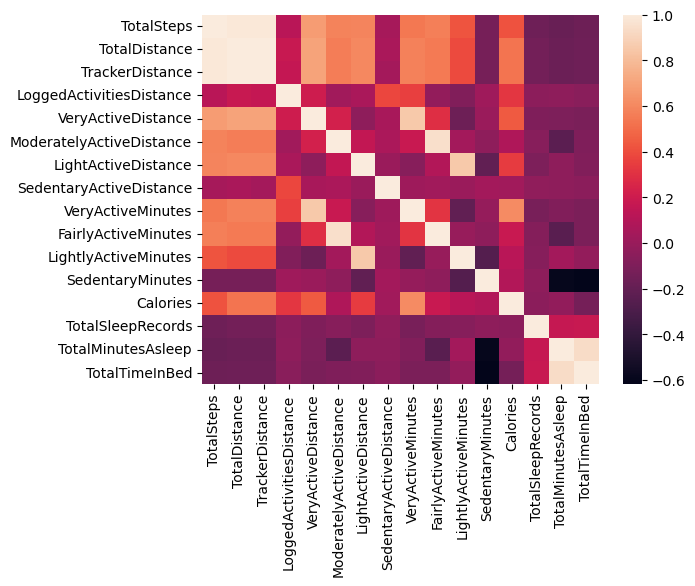

In [15]:
# first, let's drop some tables that won't likely be correlated
temp1 = CombinedTable.drop(['Id_x','ActivityDate_x','Id_y','ActivityDate_y'],axis=1)

sns.heatmap(temp1.corr())

When looking between the tables, we see that there is a very strong correlation between **TotalMinutesAsleep** and **SedentaryMinutes**

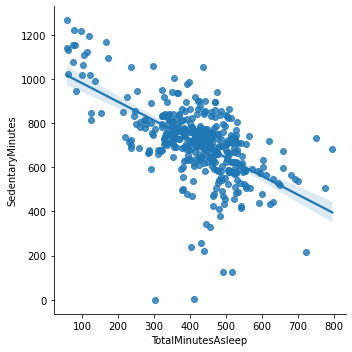

In [23]:
sns.lmplot(data=CombinedTable, x='TotalMinutesAsleep',y='SedentaryMinutes')
plt.show()

We can take a deeper dive by binning the **SedentaryMinutes** and then plotting the average for both columns for each of these bins.  This provides a discrete view of the above scatter plot

In [21]:
temp2 = CombinedTable[['TotalMinutesAsleep','SedentaryMinutes']].copy()
temp2.head()

,TotalMinutesAsleep,SedentaryMinutes
0,327,728
1,384,776
2,412,726
3,340,773
4,700,539


In [17]:
temp2['SedentaryMinutesGroups'] = pd.qcut(temp2['SedentaryMinutes'],10)
temp2.head()

,TotalMinutesAsleep,SedentaryMinutes,SedentaryMinutesGroups
0,327,728,"(717.0, 739.2]"
1,384,776,"(765.8, 815.6]"
2,412,726,"(717.0, 739.2]"
3,340,773,"(765.8, 815.6]"
4,700,539,"(527.6, 601.2]"


In [19]:
temp2.groupby('SedentaryMinutesGroups').mean()
summaryTable = temp2.groupby('SedentaryMinutesGroups').mean()
display(summaryTable)

,TotalMinutesAsleep,SedentaryMinutes
SedentaryMinutesGroups,,
"(-0.001, 527.6]",510.119048,406.047619
"(527.6, 601.2]",520.146341,571.926829
"(601.2, 659.6]",465.463415,632.146341
"(659.6, 692.0]",426.022727,678.681818
"(692.0, 717.0]",430.200000,707.075000
"(717.0, 739.2]",431.850000,729.225000
"(739.2, 765.8]",412.487805,752.512195
"(765.8, 815.6]",379.243902,787.341463
"(815.6, 887.6]",375.365854,840.390244


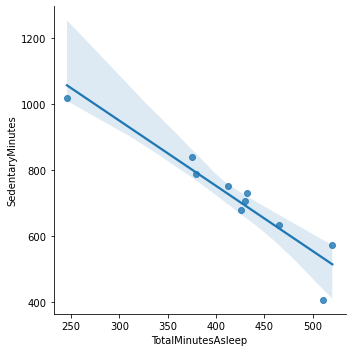

In [16]:
sns.lmplot(data=summaryTable, x='TotalMinutesAsleep',y='SedentaryMinutes')
plt.show()